# In this practice we will program a linear regression using for loops, functions and Lists

It is not a practice on regression. It is a practice on general python programming.

A linear regression is when you fit a line to a collection of data points. The line that is "closest" to all the datapoints 
is the best regression.


$y=m*x+b$
 
 formula for a line: $m$ is the slope, and $b$ is the intercept.

#### Create a function that takes m, b and x and return the y value for that x

In [1]:
def y(m, b, x):
    return m * x + b

#### Now, let's calculate the error between a data point and a line for a given x value

We will create a function called $error$, which will take in $m$, $b$ and a datapoint $[x,y]$ and it will return the distance between the line and the point.

To find the distance:
1. Get the $x$-value from the point and store is in a variable called $x_{point}$
2. Get the $y$-value from the point and store it in a variable called $y_{real}$
3. Use the $y_{hat}$ function to get the y value that "x_point" would give on the line
4. Find the difference between the y value from $y_{hat}$  and $y_{real}$
5. Return the absolute value of the distance (absolute error)

In [2]:
def error(m, b, tup):
    x_point, y_real = tup
    y_hat = y(m, b, x_point)
    return abs(y_hat - y_real)

In [3]:

print(error(1, 0, (3, 3))) #answer should be 0

print(error(1, 0, (3, 4))) #answer should be 1

print(error(1, -1, (3, 3))) #answer should be 1

print(error(-1, 1, (3, 3))) #answer should be 5

0
1
1
5


#### Next, we need to calculate the error of several datapoints against a line defined by some values of $m$, and $b$

In this part you will be given a set of datapoints and values for $m$ and $b$ andyou should compute the total error.
The total error is the sum of the individual errors for each datapoint.

The datapoints will be given as an array of tuples: i.e [(1, 1), (3, 3), (5, 5), (-1, -1)]

In [4]:
#You function goes here
def all_error(m, b, datapoints):
    total_error = 0
    for tup in datapoints:
        total_error += error(m, b, tup)
    return total_error

In [5]:

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, 0, datapoints))
# Answer should be 0

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, 1, datapoints))
# Answer should be 4

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, -1, datapoints))
# Answer should be 4


datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(-1, 1, datapoints))
# Answer should be 18

0
4
4
18


# Now we will find the $m$ and $b$ values that minimize the error

Let's create a list of possible m values to try. Make the list possible_ms that goes from -10 to 10 inclusive, in increments of 0.1

In [6]:
import numpy as np
m_values = np.arange(-10, 10.1, 0.1).round(1)
print(m_values)

[-10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3  -9.2  -9.1  -9.   -8.9
  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1  -8.   -7.9  -7.8  -7.7
  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9  -6.8  -6.7  -6.6  -6.5
  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7  -5.6  -5.5  -5.4  -5.3
  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5  -4.4  -4.3  -4.2  -4.1
  -4.   -3.9  -3.8  -3.7  -3.6  -3.5  -3.4  -3.3  -3.2  -3.1  -3.   -2.9
  -2.8  -2.7  -2.6  -2.5  -2.4  -2.3  -2.2  -2.1  -2.   -1.9  -1.8  -1.7
  -1.6  -1.5  -1.4  -1.3  -1.2  -1.1  -1.   -0.9  -0.8  -0.7  -0.6  -0.5
  -0.4  -0.3  -0.2  -0.1  -0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7
   0.8   0.9   1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9
   2.    2.1   2.2   2.3   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1
   3.2   3.3   3.4   3.5   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3
   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5
   5.6   5.7   5.8   5.9   6.    6.1   6.2   6.3   

Make a list of possible_bs to check that would be the values from -20 to 20 inclusive, in steps of 0.1:

In [7]:
b_values = np.arange(-20, 20.1, 0.1).round(1)
print(b_values)

[-20.  -19.9 -19.8 -19.7 -19.6 -19.5 -19.4 -19.3 -19.2 -19.1 -19.  -18.9
 -18.8 -18.7 -18.6 -18.5 -18.4 -18.3 -18.2 -18.1 -18.  -17.9 -17.8 -17.7
 -17.6 -17.5 -17.4 -17.3 -17.2 -17.1 -17.  -16.9 -16.8 -16.7 -16.6 -16.5
 -16.4 -16.3 -16.2 -16.1 -16.  -15.9 -15.8 -15.7 -15.6 -15.5 -15.4 -15.3
 -15.2 -15.1 -15.  -14.9 -14.8 -14.7 -14.6 -14.5 -14.4 -14.3 -14.2 -14.1
 -14.  -13.9 -13.8 -13.7 -13.6 -13.5 -13.4 -13.3 -13.2 -13.1 -13.  -12.9
 -12.8 -12.7 -12.6 -12.5 -12.4 -12.3 -12.2 -12.1 -12.  -11.9 -11.8 -11.7
 -11.6 -11.5 -11.4 -11.3 -11.2 -11.1 -11.  -10.9 -10.8 -10.7 -10.6 -10.5
 -10.4 -10.3 -10.2 -10.1 -10.   -9.9  -9.8  -9.7  -9.6  -9.5  -9.4  -9.3
  -9.2  -9.1  -9.   -8.9  -8.8  -8.7  -8.6  -8.5  -8.4  -8.3  -8.2  -8.1
  -8.   -7.9  -7.8  -7.7  -7.6  -7.5  -7.4  -7.3  -7.2  -7.1  -7.   -6.9
  -6.8  -6.7  -6.6  -6.5  -6.4  -6.3  -6.2  -6.1  -6.   -5.9  -5.8  -5.7
  -5.6  -5.5  -5.4  -5.3  -5.2  -5.1  -5.   -4.9  -4.8  -4.7  -4.6  -4.5
  -4.4  -4.3  -4.2  -4.1  -4.   -3.9  -3.8  -3.7  -

Now calculate the best m and b values for this dataset.

datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]

We are going to find the smallest error. First, we will make every possible `y = m*x + b` line by pairing all of the possible `m`s with all of the possible `b`s. Then, we will see which `y = m*x + b` line produces the smallest total error with the set of data stored in `datapoint`.

First, create the variables that we will be optimizing:
* `smallest_error` &mdash; this should start at infinity (`float("inf")`) so that any error we get at first will be smaller than our value of `smallest_error`
* `best_m` &mdash; we can start this at `0`
* `best_b` &mdash; we can start this at `0`

We want to:
* Iterate through each element `m` in `possible_ms`
* For every `m` value, take every `b` value in `possible_bs`
* If the value returned from `calculate_all_error` on this `m` value, this `b` value, and `datapoints` is less than our current `smallest_error`,
* Set `best_m` and `best_b` to be these values, and set `smallest_error` to this error.

By the end of these nested loops, the `smallest_error` should hold the smallest error we have found, and `best_m` and `best_b` should be the values that produced that smallest error value.

Print out `best_m`, `best_b` and `smallest_error` after the loops.



In [8]:
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]
smallest_error = float("inf")
best_m = 0
best_b = 0
#write the code
for m in m_values:
    for b in b_values:
        current_error = all_error(m,b,datapoints)
        if current_error < smallest_error:
            smallest_error = current_error
            best_m = m
            best_b = b
print("m:",best_m)
print("b:",best_b)
print("smallest error:",smallest_error)

m: 0.4
b: 1.6
smallest error: 5.0


In [9]:
m

10.0

In [10]:
b

20.0

In [11]:
current_error

237.0

In [12]:
smallest_error

5.0

In [13]:
best_m

0.4

In [14]:
best_b

1.6

# Homework

# Do the following
1) Plot a scatter plot of the datapoints in the array (you should investigate what a scatter plot is).

2) In the same plot, draw five different lines in blue color for five randomly-chosen pairs of m,b in m_list and b_list respectively.

3) Again, in the same plot draw the line with the best_m and best_b values in red color

Note*: For this exercise you may use random library and matplotlib.pyplot library.

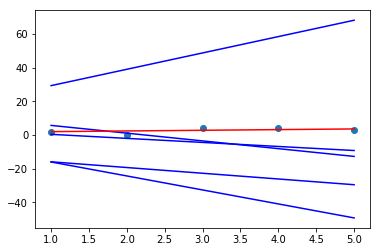

In [16]:
import random
import numpy as np
from matplotlib import pyplot as plt

x_values = [1, 2, 3, 4, 5]
y_values = [2, 0, 4, 4, 3]
plt.scatter(x_values, y_values)
for i in range(5):
    m = random.choice(m_values)
    b = random.choice(b_values)
    plt.plot([1,5], [y(m,b,1), y(m,b,5)], 'b')
plt.plot([1,5], [y(best_m, best_b, 1), y(best_m, best_b, 5)], 'r')
plt.show()